In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# **ADD DATASET**

MAGIC Gamma Telescope

https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [38]:
# ADD LABEL TO THE TABLE
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# READ DATASET
df = pd.read_csv('magic04.data', names = cols)

# CHANGE CLASS FROM CHAR INTO INT (ENCODING)
# GAMMA AS 1, HADRON AS 0
df["class"] = (df["class"]== "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

# **VISUALIZING EACH COLUMNS AND COMPARING THEM BASED ON THE CLASS**

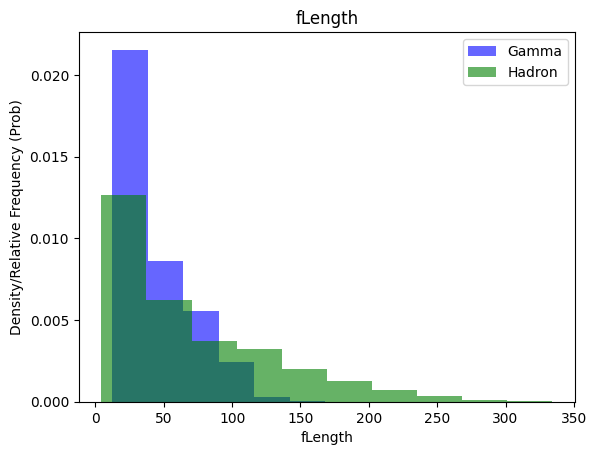

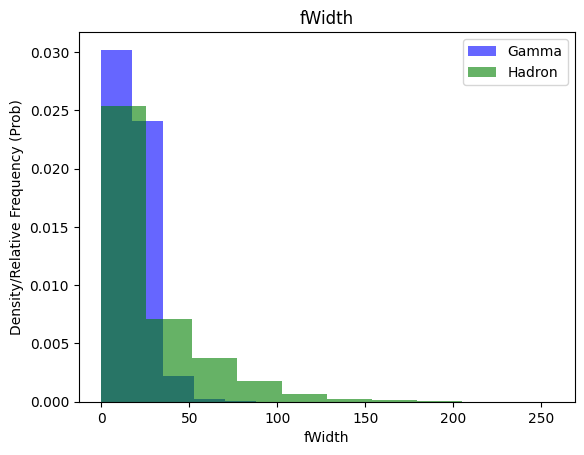

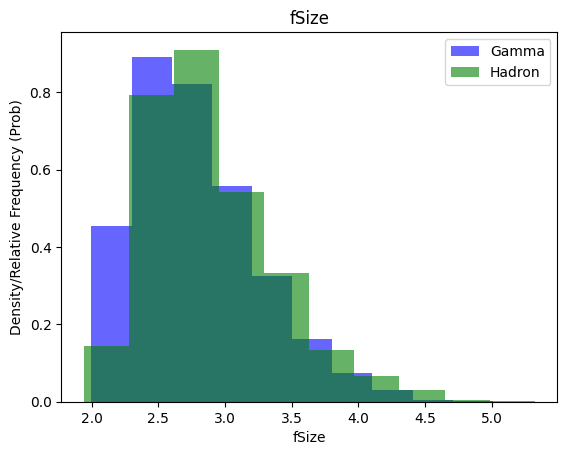

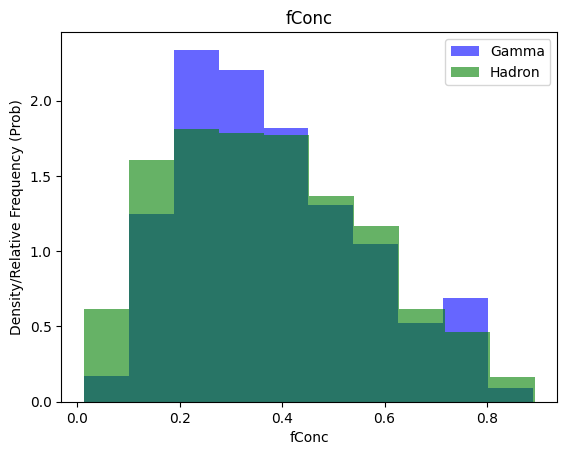

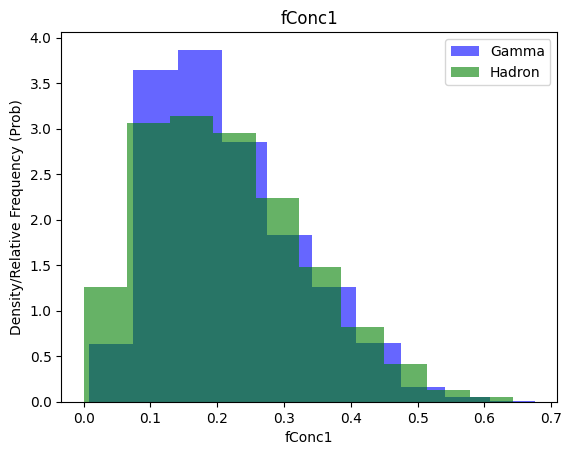

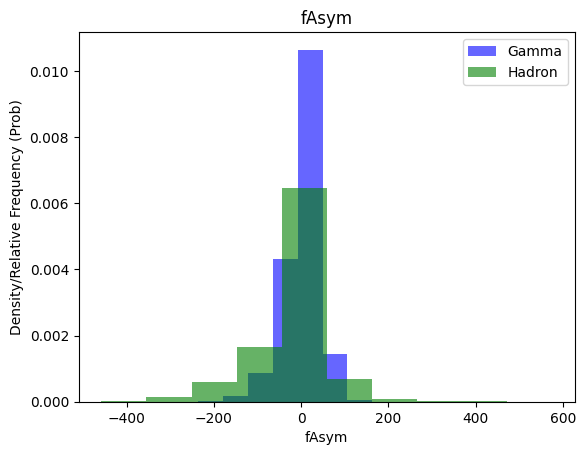

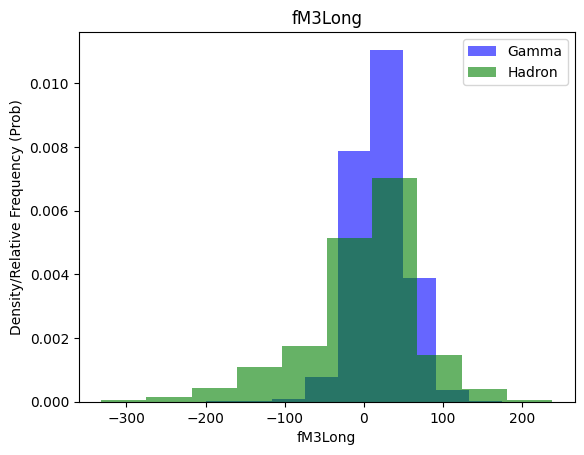

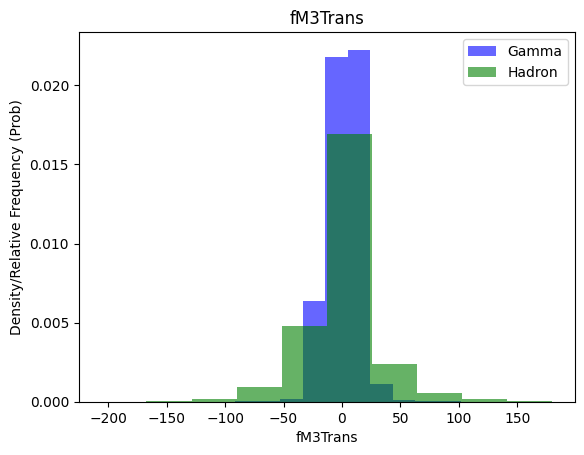

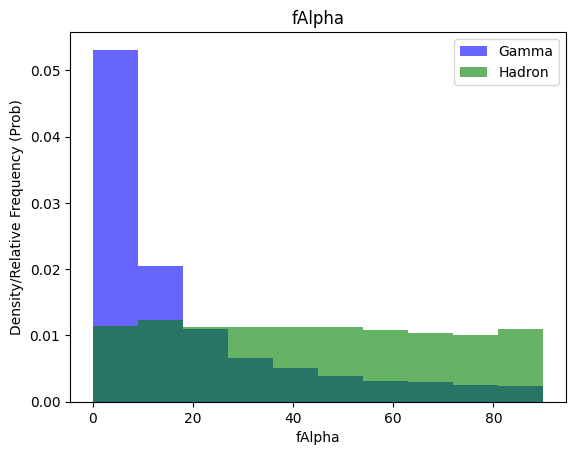

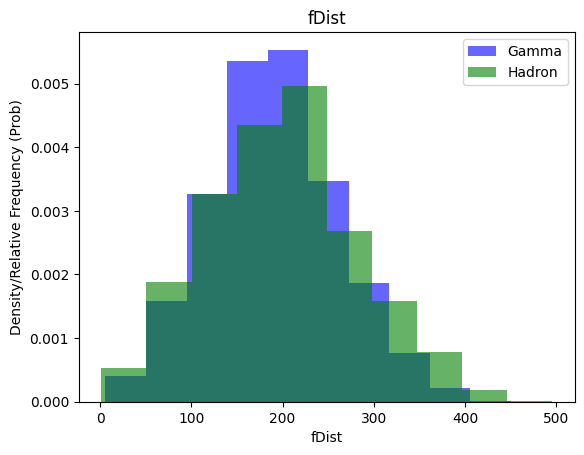

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [39]:
for dfLabel in df.columns[:-1]:
    # Create a new figure for each feature
    plt.figure()

    # Plot histogram for class 1
    plt.hist(df[df["class"] == 1][dfLabel], color='blue', label='Gamma', alpha=0.6, density=True)
    # Plot histogram for class 0
    plt.hist(df[df["class"] == 0][dfLabel], color='green', label='Hadron', alpha=0.6, density=True)

    # Set title, labels, and legend for the plot
    plt.title(dfLabel)
    plt.ylabel("Density/Relative Frequency (Prob)")
    plt.xlabel(dfLabel)
    plt.legend()

    # Show the plot
    plt.show()

df.head()

# **PREPARING DATASET FOR TRAINING, VALIDATION, AND TEST**

Sampling, scaling, normalization/standardization, oversampling, etc.

In [40]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [41]:
# MAKE STANDARDIZATION AND OVERSAMPLE SCALING FUNCTION
# Param = 1. dataframe, 2. oversample (true or false)
# Return = 1. dataframe, 2. X_dataframe (feature), 3. y_dataframe (target)

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Standardization must be done because there are gaps on each column's values (the technique is likely the same as normalization)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # In this case the  gamma's dataset (class 1) is more than the hadron's (class 0), that can be an issue.
  # We have to make the train hadron's amount is the same as gamma's by oversampling.
  # Take more of the less class' ammount of dataset, increase the amount and keep sampling from there so the that their amount matches (equal).
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # Merge the data again with y in a 2d array horizontal stack. The y is reshaped into 2d (?)
  data=np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [42]:
# SHOW TRAIN DATASET
train

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
7955   26.0965  16.0825  2.5179  0.3551  0.1806 -31.4925 -14.3983    9.9377   
15795  50.8745  10.5763  2.5244  0.3663  0.1858  63.2724  45.5987  -13.1514   
13606  45.3970   9.8762  2.8720  0.3904  0.2007   6.9170  47.6066   -3.6372   
10284  20.6018  12.8221  2.4273  0.4224  0.2112  16.2739  -4.2368    8.6716   
16463  72.8278  16.3008  2.9082  0.3541  0.1934  59.3304  53.0262   -6.4840   
...        ...      ...     ...     ...     ...      ...      ...       ...   
10821  38.9090  19.5587  2.9044  0.2218  0.1115  32.9730   9.7464   11.7351   
12293  29.2730  15.5049  2.7638  0.3807  0.2214   6.6386  14.9493  -11.4603   
12128  62.6388  21.8317  3.2103  0.2323  0.1186  38.1140  46.9907   10.1773   
14392  42.0911  31.0862  2.8278  0.1726  0.1212  39.4377  32.8220  -21.5423   
9894   58.7014  29.1229  3.5139  0.1703  0.0883  33.1923  53.0612  -21.9219   

        fAlpha     fDist  class  
7955   17.6380  103.5210      1  
15795  59.6781  158.4316      0  
13606  29.0002  245.3801      0  
10284  74.8370   68.8021      1  
16463  23.3547  246.8571      0  
...        ...       ...    ...  
10821   2.8165  183.1010      1  
12293  43.1540  106.0840      1  
12128   4.2710  253.9040      1  
14392  71.3772  247.1991      0  
9894   10.1170  199.4600      1  

[11412 rows x 11 columns]

In [43]:
# DECLARE AND USE THE FUNCTION

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [44]:
print(sum(y_train==1))
print(sum(y_train==0))
print(len(y_train))

7359
7359
14718


Now the data is scaled and the data is ready.

# **kNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# CLASSIFICATION REPORT TO SEE ACCURACY, PRECISION, AND RECALL
from sklearn.metrics import classification_report

In [46]:
# How much neighbors to be classified
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fitting the model into the dataset
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Let's see the test and prediction target (in this case the visible is 6/6 which is great)

In [47]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [48]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1289
           1       0.86      0.86      0.86      2515

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Precision = True positives / (All true labeled)

Recall = True positives / (Relevant elements)

All true labeled means true positives + false positives.
Relevant elements means true positives + false negatives.

https://en.wikipedia.org/wiki/Precision_and_recall

# **Naive Bayes**

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model = GaussianNB()

# Fitting the model into the dataset
nb_model.fit(X_train, y_train)

GaussianNB()

Let's see the test and the prediction target (in this case the visible is 2/6 which this might be bad but let's see the report)

In [52]:
y_pred = nb_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [53]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1289
           1       0.75      0.90      0.81      2515

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Worse accuracy, precision, and recall from Naive Bayes model

# **Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logres_model = LogisticRegression()

# Fitting the model into the dataset
logres_model.fit(X_train, y_train)

LogisticRegression()

Let's see the test and prediction target (in this case the visible is 6/6 which is good)

In [57]:
y_pred = logres_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [58]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1289
           1       0.85      0.82      0.83      2515

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



Slightly worse than kNN but better than Naive Bayes

# **Support Vector Machine (SVM)**

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model = SVC()

# Fitting the model into the dataset
svm_model.fit(X_train, y_train)

SVC()

Let's see the test and prediction target (in this case the visible is 4/6 which is pretty good)

In [62]:
y_pred = svm_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [63]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1289
           1       0.89      0.90      0.90      2515

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



This might be the better model than kNN for this dataset

# **Neural Network**

In [65]:
import tensorflow as tf

In [69]:
# PLOT DIAGRAM FUNCTION FOR LOSS AND ACCURACY  

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()


In [70]:

#* TRAIN MODEL FUNCTION SO WE CAN TRAIN MORE MODELS WITH THOSE PARAMETERS MANIPULATED (X_train, y_train, ...)
#* RETURNS MODEL AND ITS HISTORY

# PARAMETERS INFO:
# num_nodes = Number of nodes
# dropout_prob = Dropout, randomly choose certain nodes and don't train them in certain iterations (not contribute to the computation of activations)
# lr = determines the step size at each iteration while moving toward a minimum of a loss function (backpropagation)
# batch_size = The number of training samples used in one iteration.
# epochs = Number of training cycles. One full cycle through the training dataset. A cycle is composed of many iterations.

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    
    # MAKE A NEURAL NETWORK MODEL BY CREATING A LINEAR STACK OF LAYERS
    # Consists of input layers, hidden layers, and an output layer
    # Dense means each neuron is connected to each other
    # Activation is a function that wouldn't make the model become linear
    # Input shape = 10 because the input is 10 long dimensions (data with 10 features/vector)
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # COMPILING MODEL
    # https://www.geeksforgeeks.org/tensorflow-js-tf-layersmodel-class-compile-method/
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    # FITTING MODEL AND PUT IT IN HISTORY
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


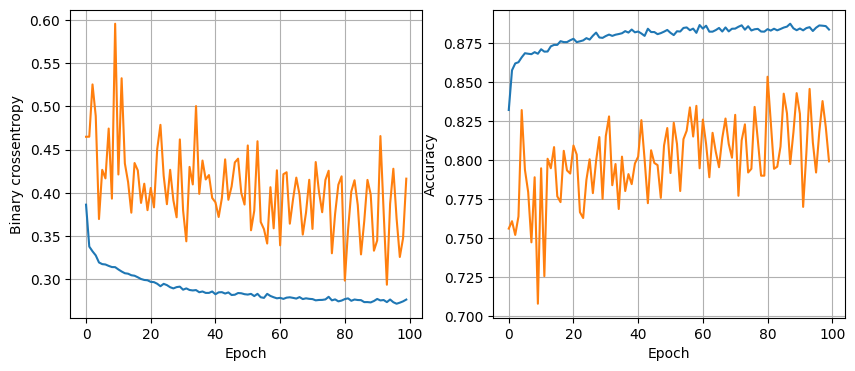

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8765 - loss: 0.3238
16 nodes, dropout 0, lr 0.01, batch size 64


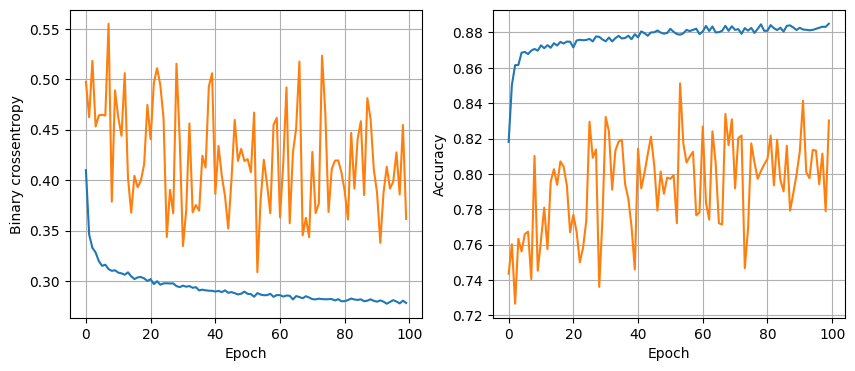

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8582 - loss: 0.3247
16 nodes, dropout 0, lr 0.01, batch size 128


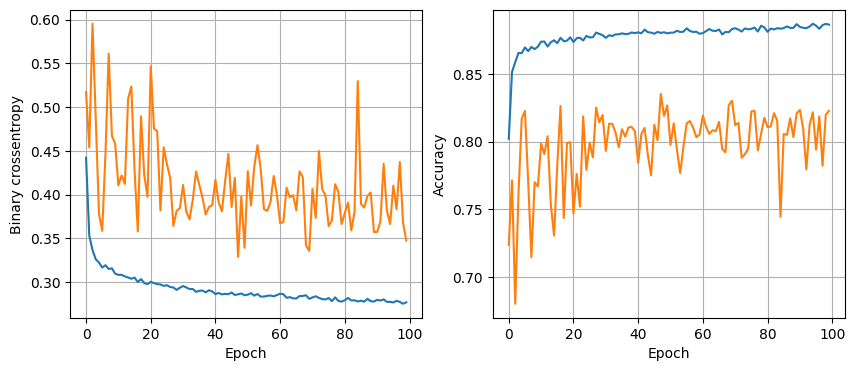

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8747 - loss: 0.3060
16 nodes, dropout 0, lr 0.005, batch size 32


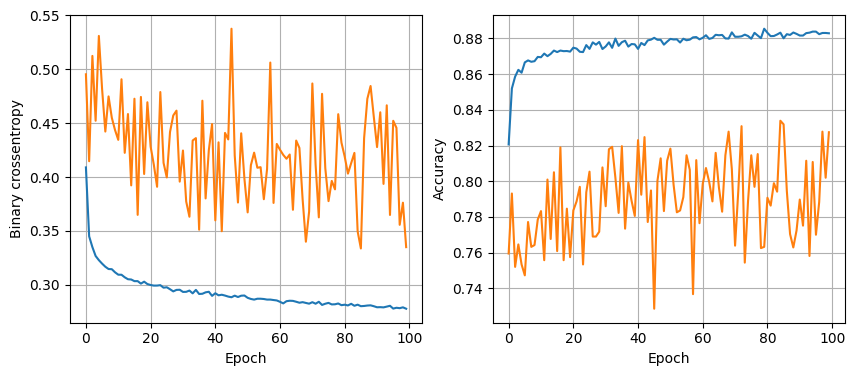

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8659 - loss: 0.3184
16 nodes, dropout 0, lr 0.005, batch size 64


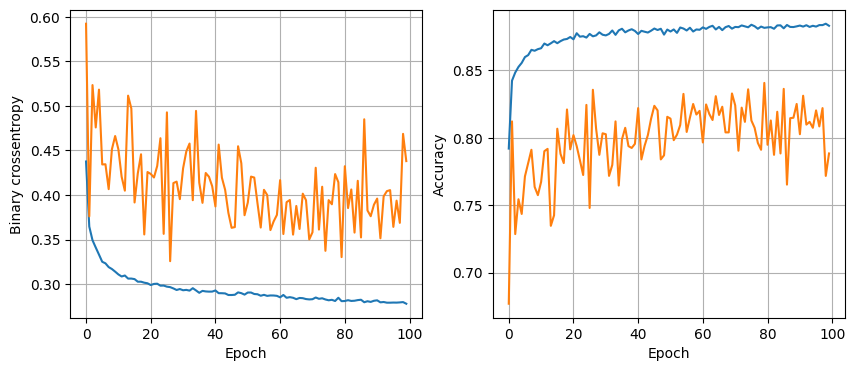

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8761 - loss: 0.3000
16 nodes, dropout 0, lr 0.005, batch size 128


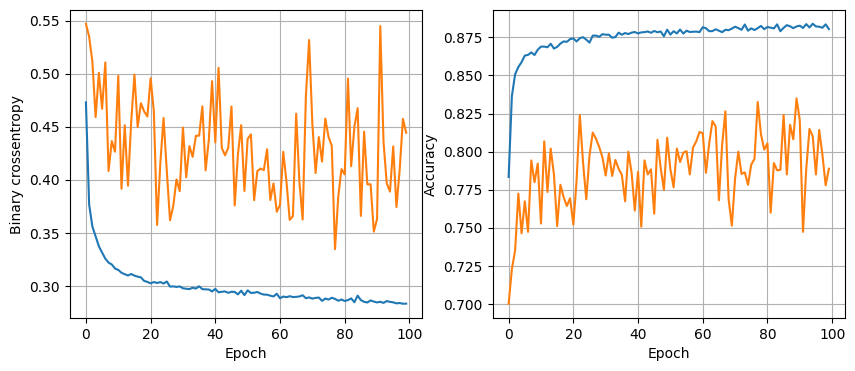

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.8741 - loss: 0.3010
16 nodes, dropout 0, lr 0.001, batch size 32


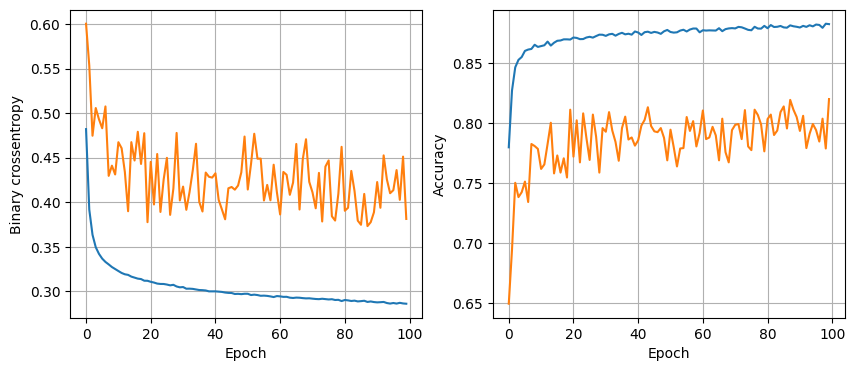

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8752 - loss: 0.3001
16 nodes, dropout 0, lr 0.001, batch size 64


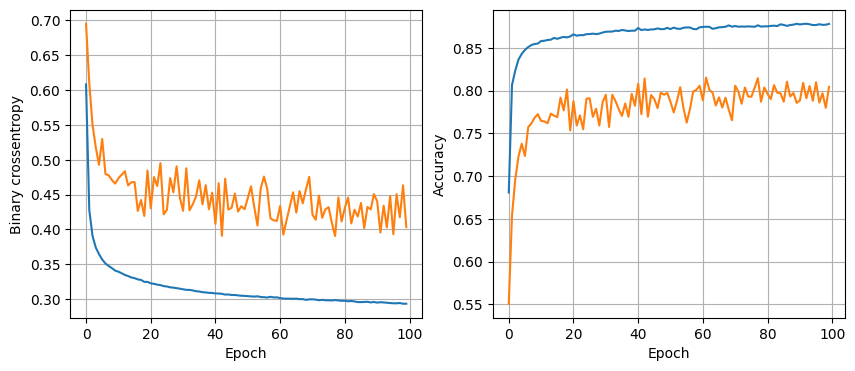

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8709 - loss: 0.3139
16 nodes, dropout 0, lr 0.001, batch size 128


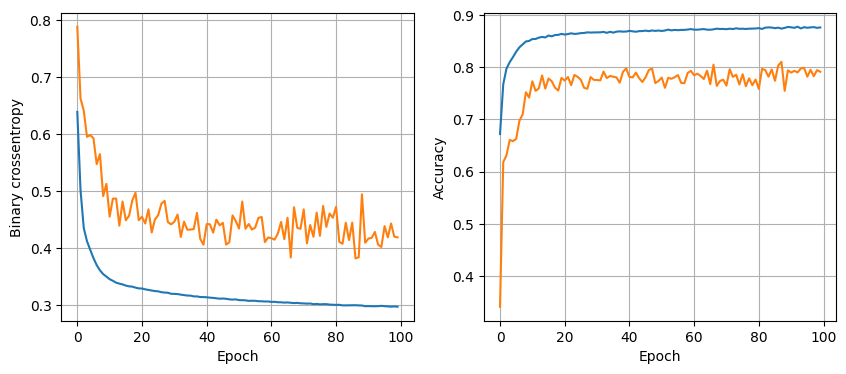

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8748 - loss: 0.3101
16 nodes, dropout 0.2, lr 0.01, batch size 32


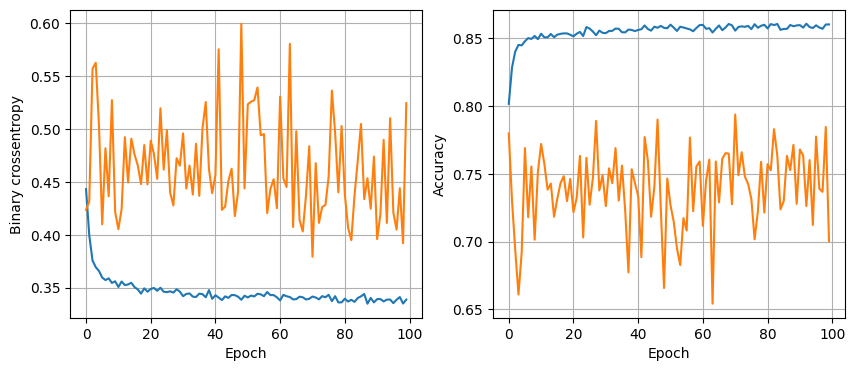

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8720 - loss: 0.3154
16 nodes, dropout 0.2, lr 0.01, batch size 64


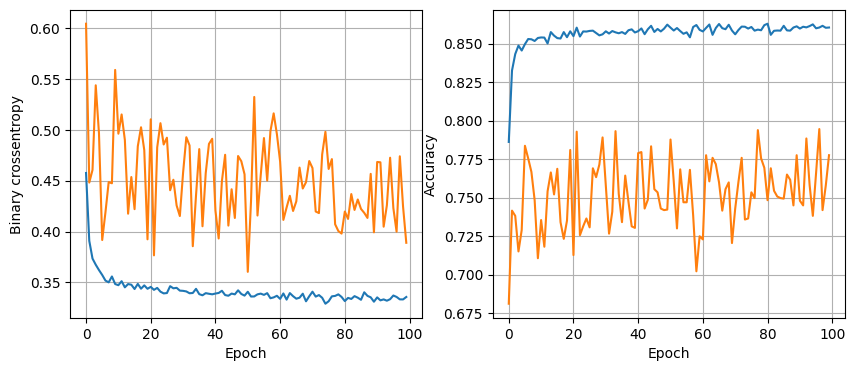

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8689 - loss: 0.3270
16 nodes, dropout 0.2, lr 0.01, batch size 128


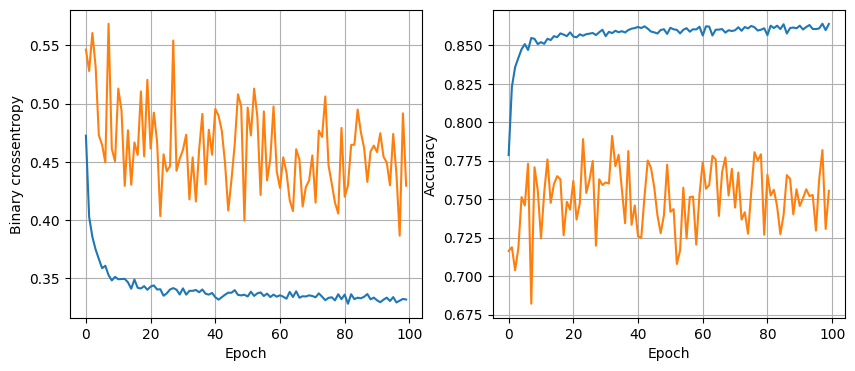

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.8748 - loss: 0.3160
16 nodes, dropout 0.2, lr 0.005, batch size 32


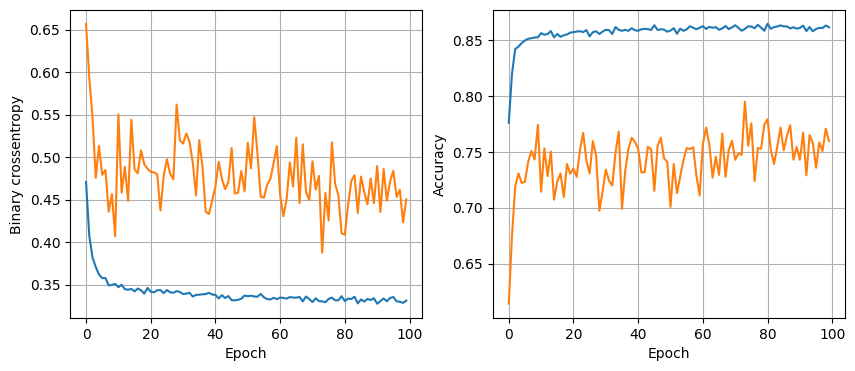

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8706 - loss: 0.3125
16 nodes, dropout 0.2, lr 0.005, batch size 64


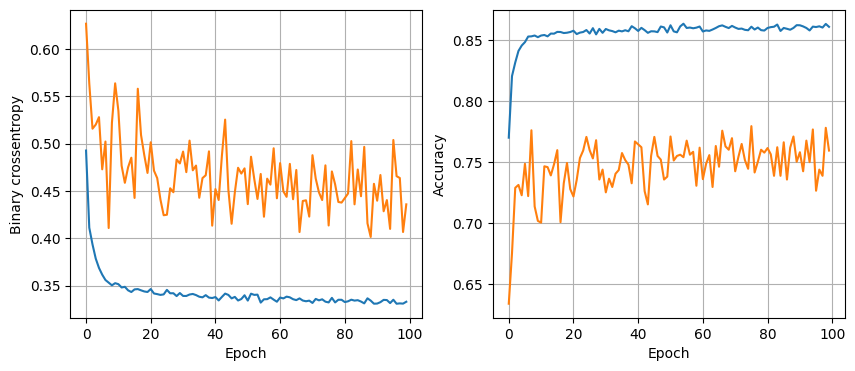

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8726 - loss: 0.3138
16 nodes, dropout 0.2, lr 0.005, batch size 128


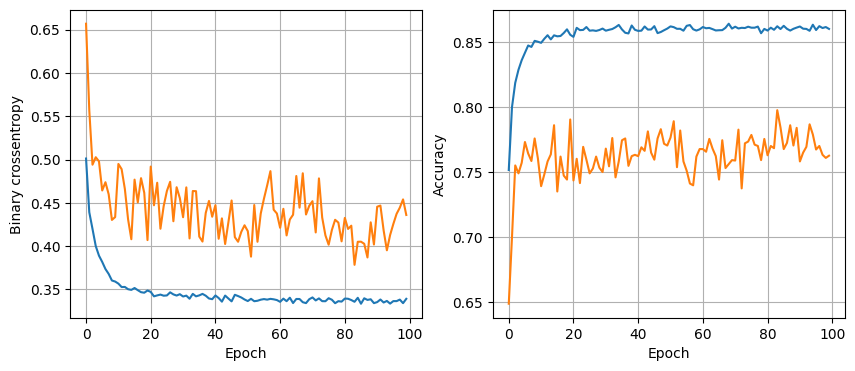

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8727 - loss: 0.3137
16 nodes, dropout 0.2, lr 0.001, batch size 32


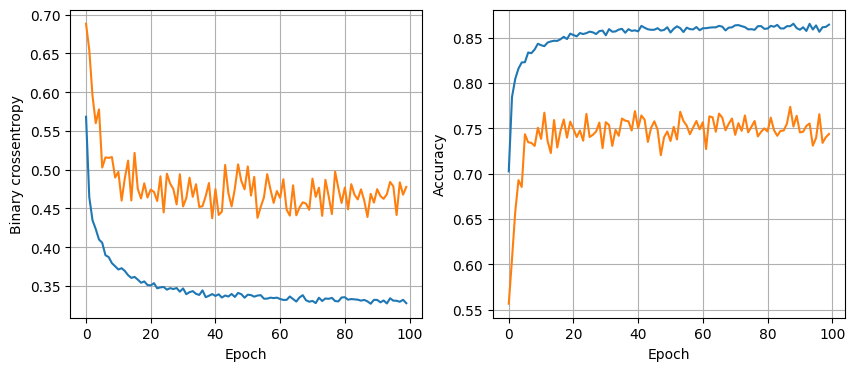

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8721 - loss: 0.3115
16 nodes, dropout 0.2, lr 0.001, batch size 64


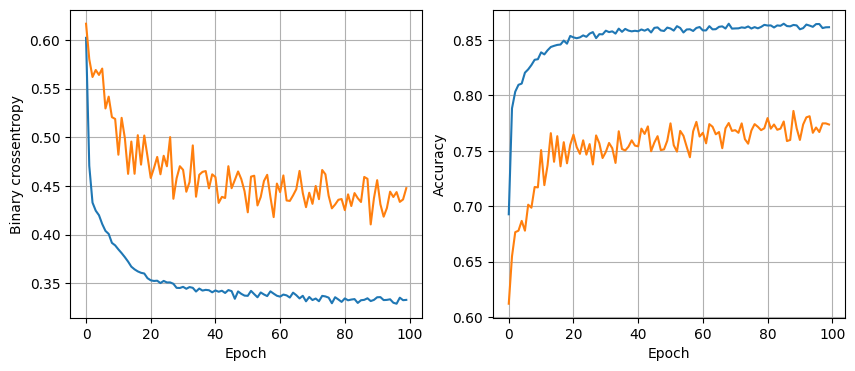

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8715 - loss: 0.3104
16 nodes, dropout 0.2, lr 0.001, batch size 128


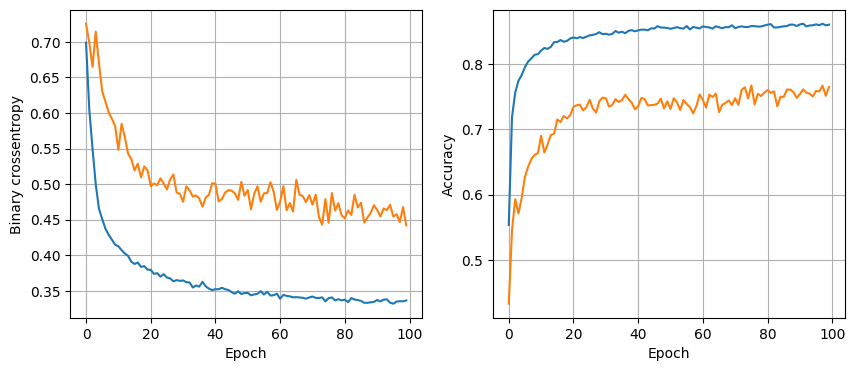

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8705 - loss: 0.3163
32 nodes, dropout 0, lr 0.01, batch size 32


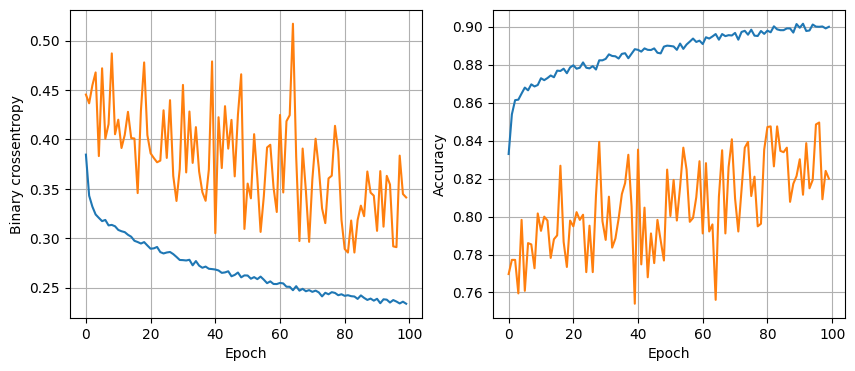

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8651 - loss: 0.3997
32 nodes, dropout 0, lr 0.01, batch size 64


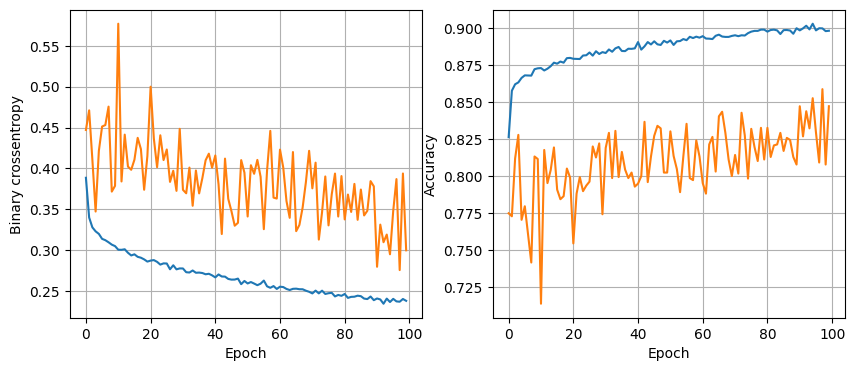

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8651 - loss: 0.3648
32 nodes, dropout 0, lr 0.01, batch size 128


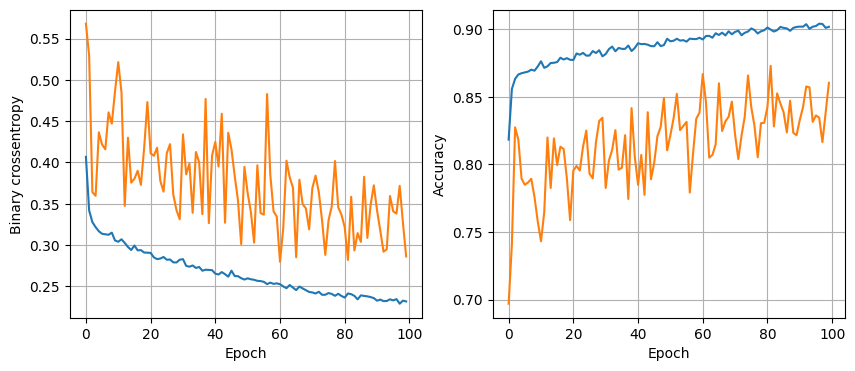

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8606 - loss: 0.4022
32 nodes, dropout 0, lr 0.005, batch size 32


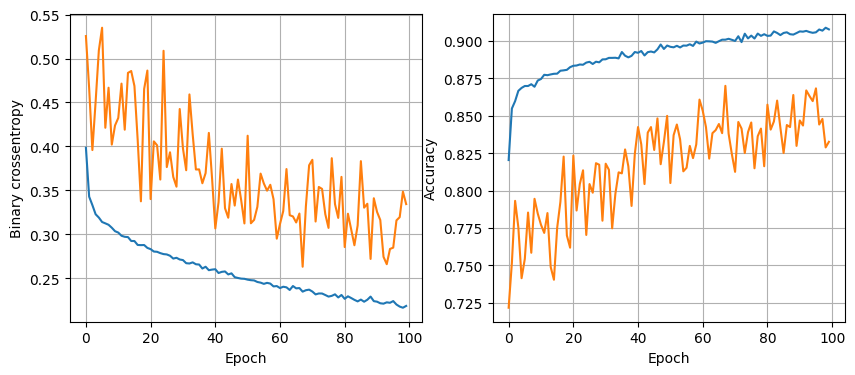

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8592 - loss: 0.4171
32 nodes, dropout 0, lr 0.005, batch size 64


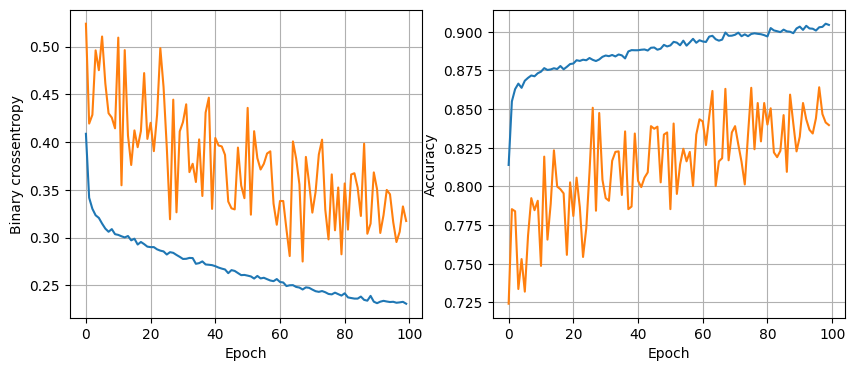

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8730 - loss: 0.3437
32 nodes, dropout 0, lr 0.005, batch size 128


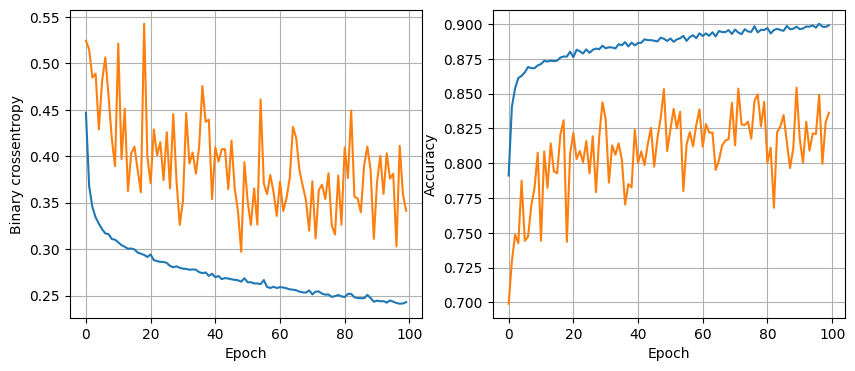

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8658 - loss: 0.3423
32 nodes, dropout 0, lr 0.001, batch size 32


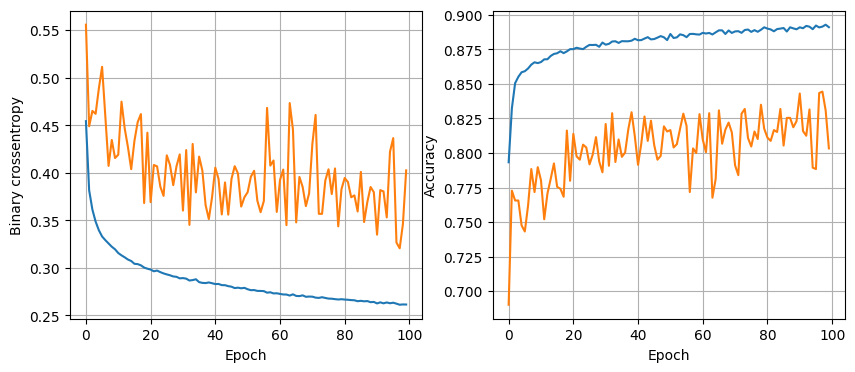

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8731 - loss: 0.3194
32 nodes, dropout 0, lr 0.001, batch size 64


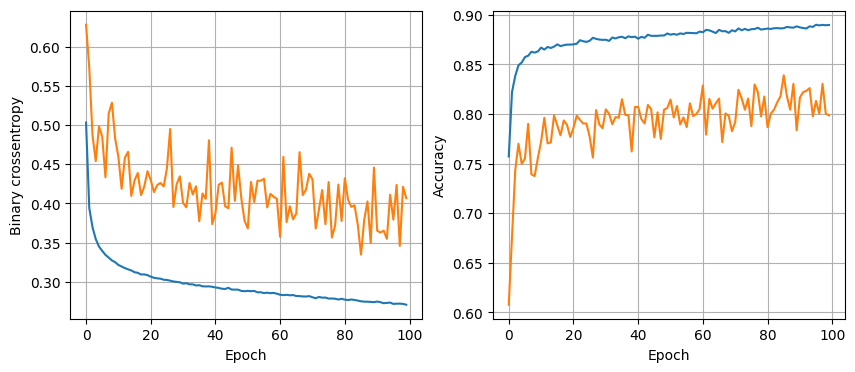

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8736 - loss: 0.3123
32 nodes, dropout 0, lr 0.001, batch size 128


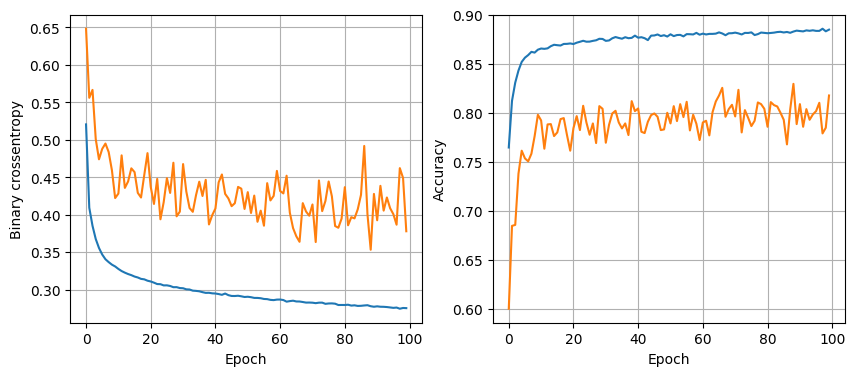

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8711 - loss: 0.3092
32 nodes, dropout 0.2, lr 0.01, batch size 32


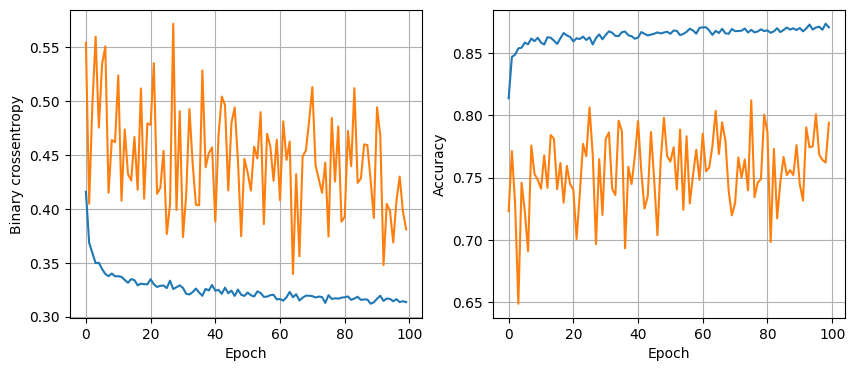

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.8800 - loss: 0.3134
32 nodes, dropout 0.2, lr 0.01, batch size 64


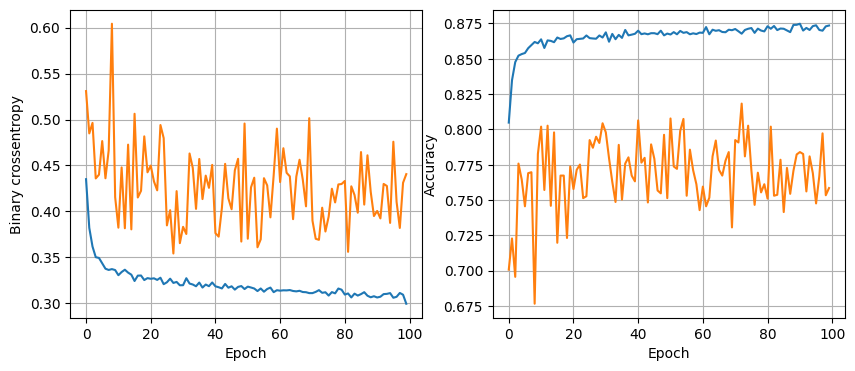

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8786 - loss: 0.2995
32 nodes, dropout 0.2, lr 0.01, batch size 128


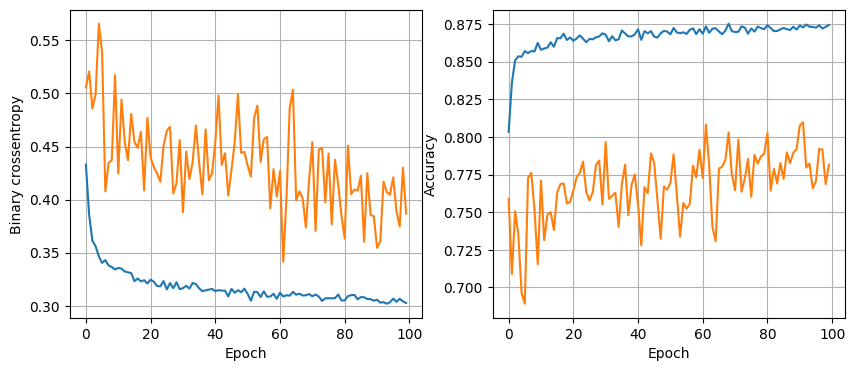

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8763 - loss: 0.2968
32 nodes, dropout 0.2, lr 0.005, batch size 32


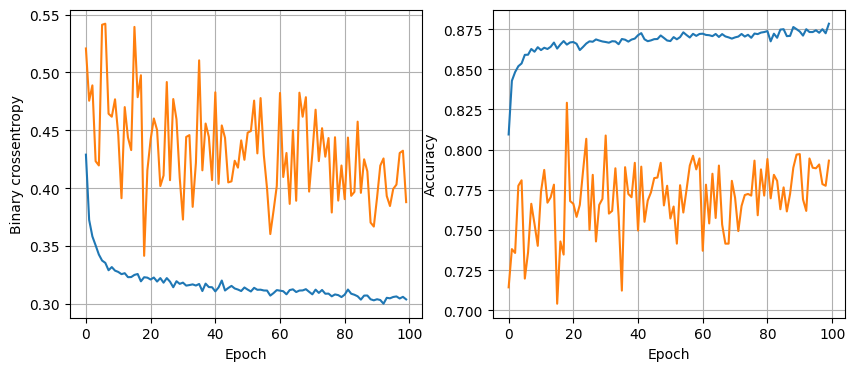

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8758 - loss: 0.2970
32 nodes, dropout 0.2, lr 0.005, batch size 64


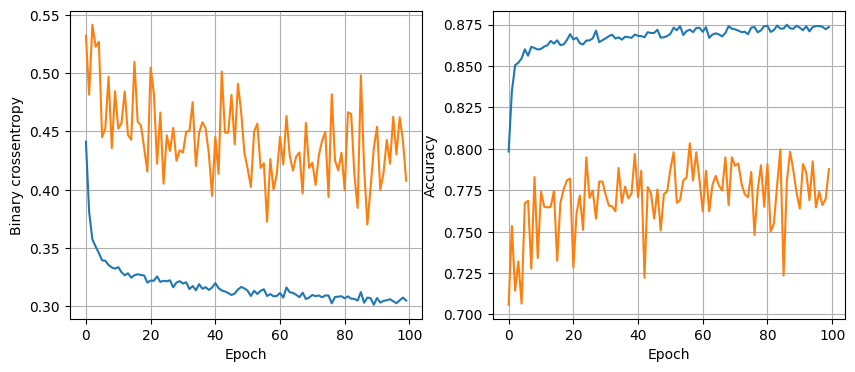

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.8776 - loss: 0.2941
32 nodes, dropout 0.2, lr 0.005, batch size 128


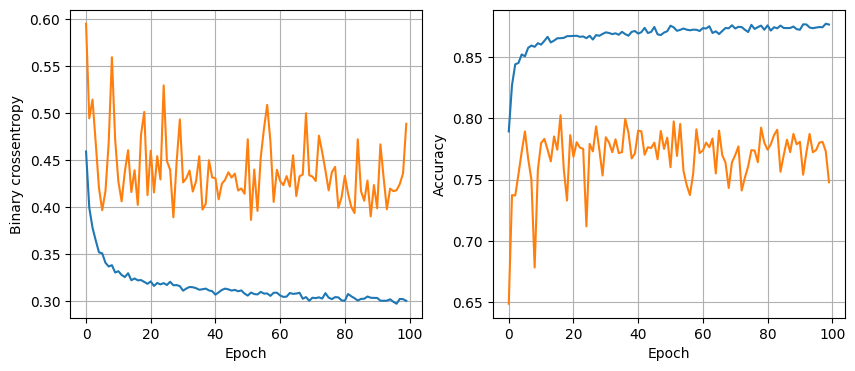

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8776 - loss: 0.2982
32 nodes, dropout 0.2, lr 0.001, batch size 32


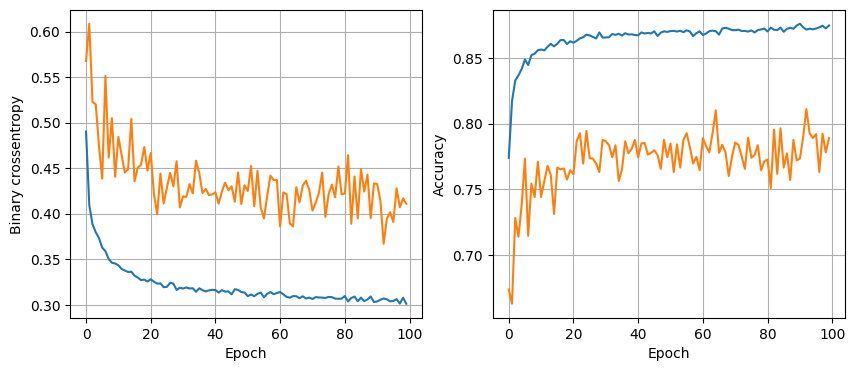

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8759 - loss: 0.2988
32 nodes, dropout 0.2, lr 0.001, batch size 64


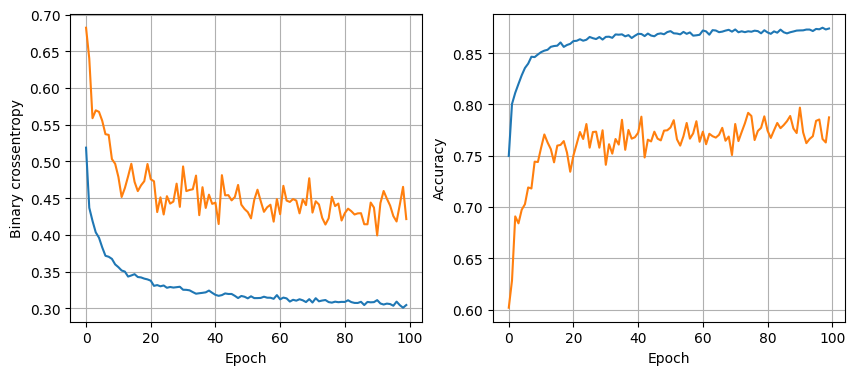

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8716 - loss: 0.2959
32 nodes, dropout 0.2, lr 0.001, batch size 128


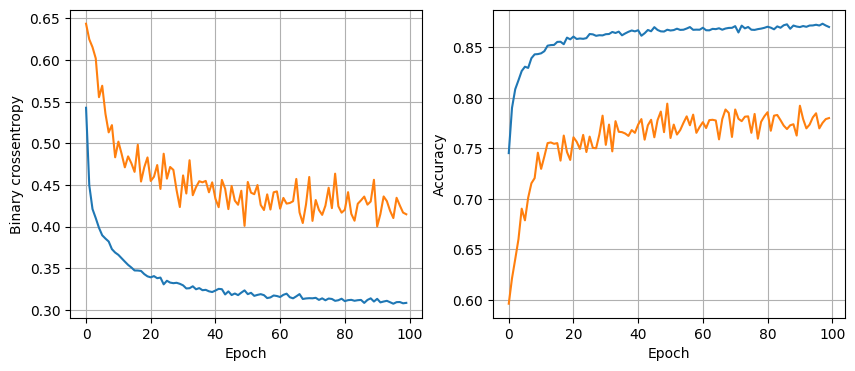

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8749 - loss: 0.2990
64 nodes, dropout 0, lr 0.01, batch size 32


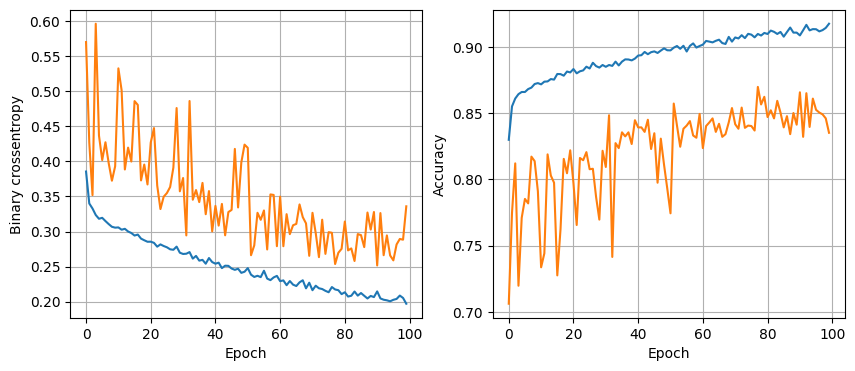

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8665 - loss: 0.5142
64 nodes, dropout 0, lr 0.01, batch size 64


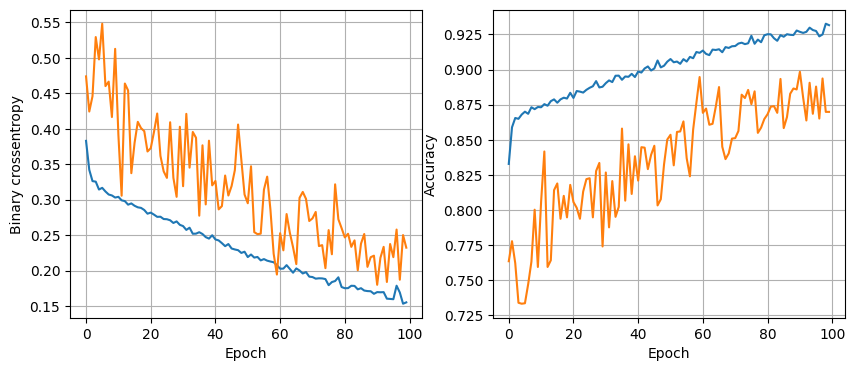

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8644 - loss: 0.6065
64 nodes, dropout 0, lr 0.01, batch size 128


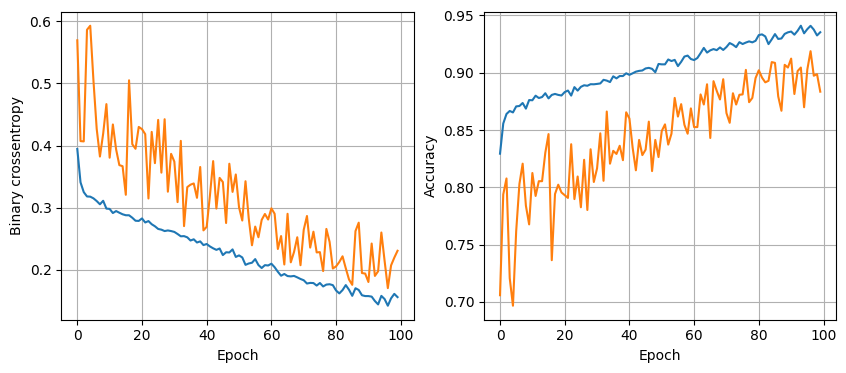

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8625 - loss: 0.5743
64 nodes, dropout 0, lr 0.005, batch size 32


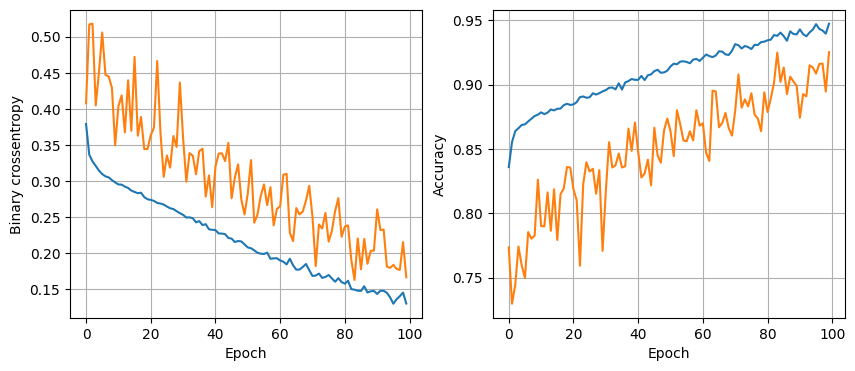

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.8567 - loss: 0.7122
64 nodes, dropout 0, lr 0.005, batch size 64


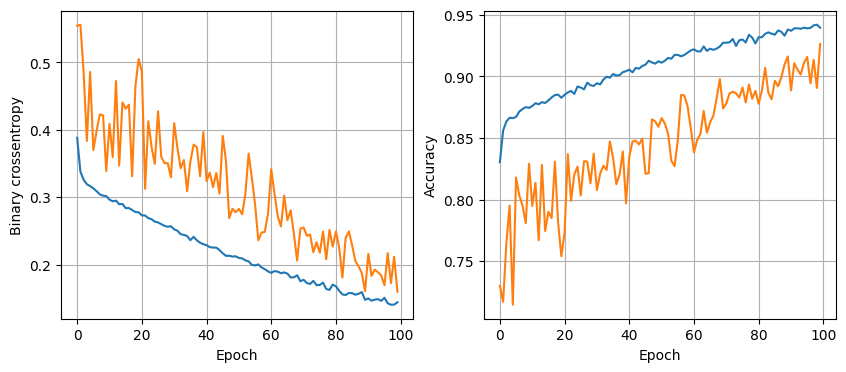

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.8492 - loss: 0.7246
64 nodes, dropout 0, lr 0.005, batch size 128


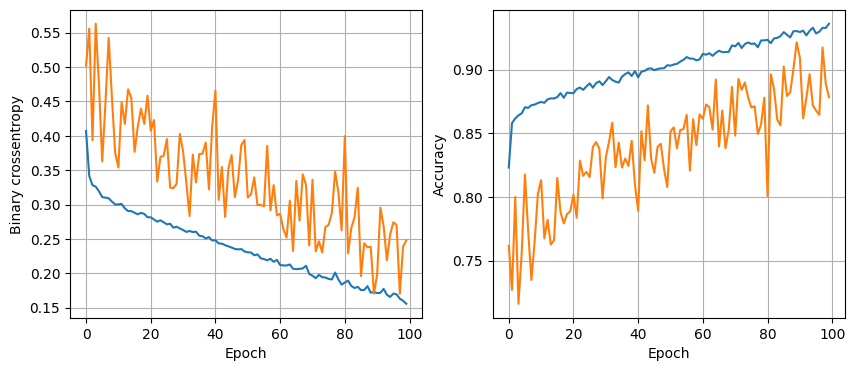

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.8584 - loss: 0.4729
64 nodes, dropout 0, lr 0.001, batch size 32


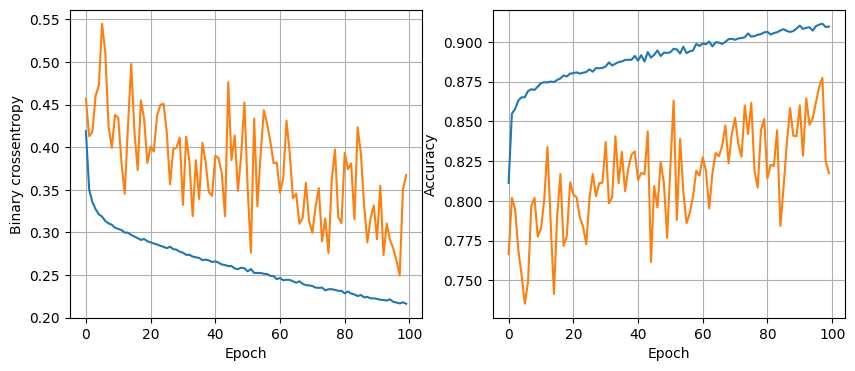

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.3452
64 nodes, dropout 0, lr 0.001, batch size 64


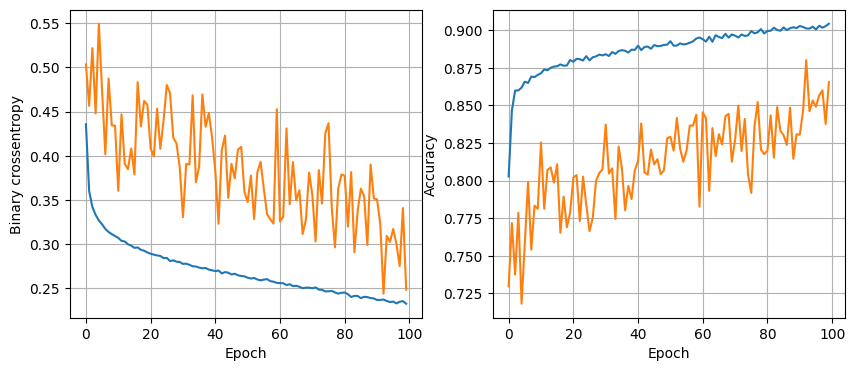

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8554 - loss: 0.3557
64 nodes, dropout 0, lr 0.001, batch size 128


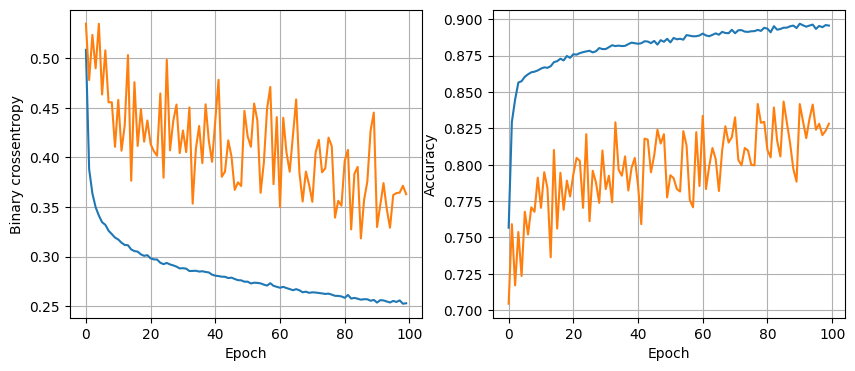

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8702 - loss: 0.3209
64 nodes, dropout 0.2, lr 0.01, batch size 32


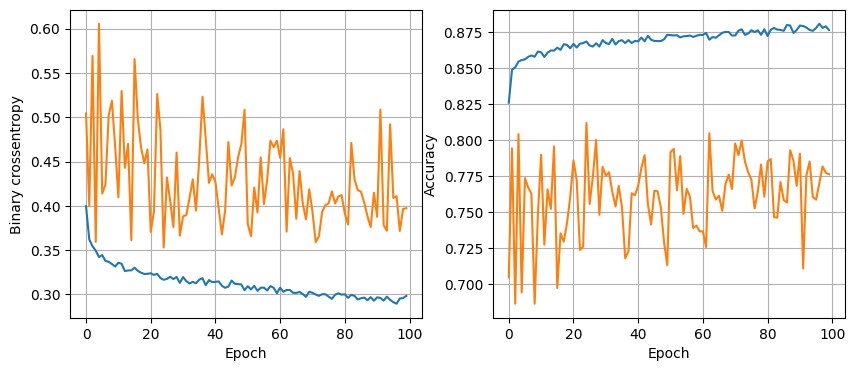

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8823 - loss: 0.3116
64 nodes, dropout 0.2, lr 0.01, batch size 64


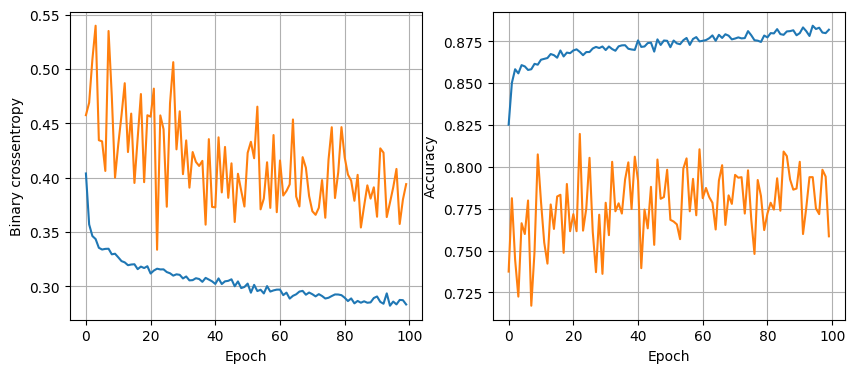

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.8723 - loss: 0.2986
64 nodes, dropout 0.2, lr 0.01, batch size 128


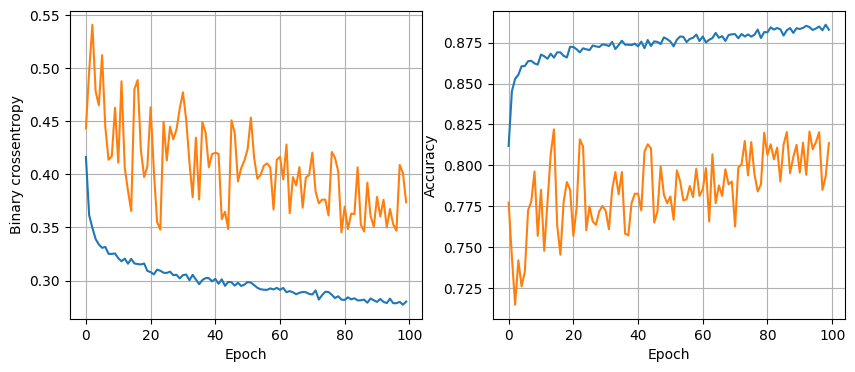

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8812 - loss: 0.2948
64 nodes, dropout 0.2, lr 0.005, batch size 32


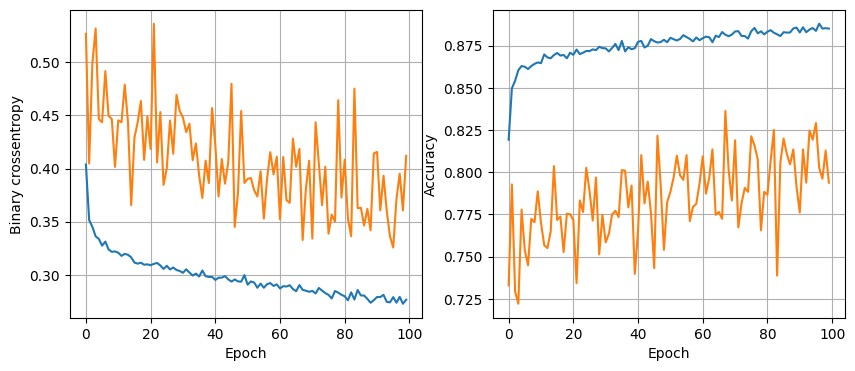

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8772 - loss: 0.2933
64 nodes, dropout 0.2, lr 0.005, batch size 64


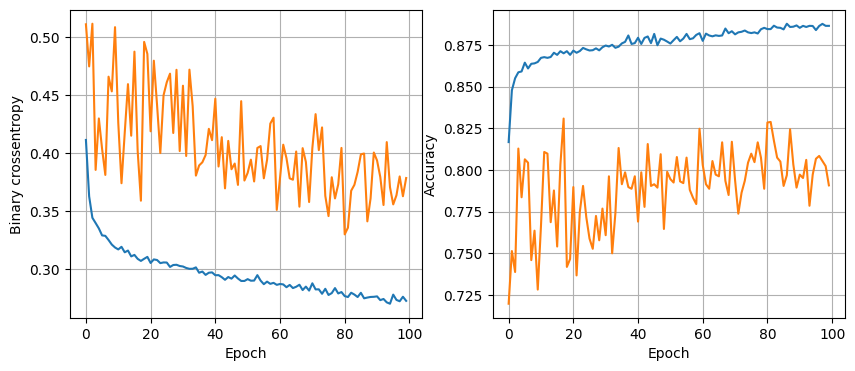

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.8815 - loss: 0.2904
64 nodes, dropout 0.2, lr 0.005, batch size 128


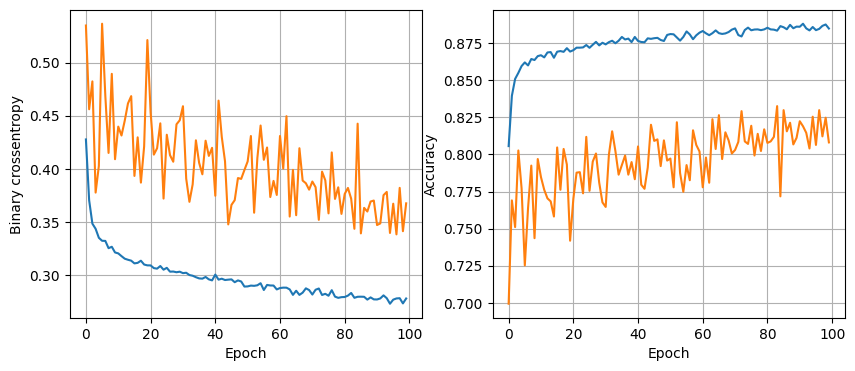

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8833 - loss: 0.2918
64 nodes, dropout 0.2, lr 0.001, batch size 32


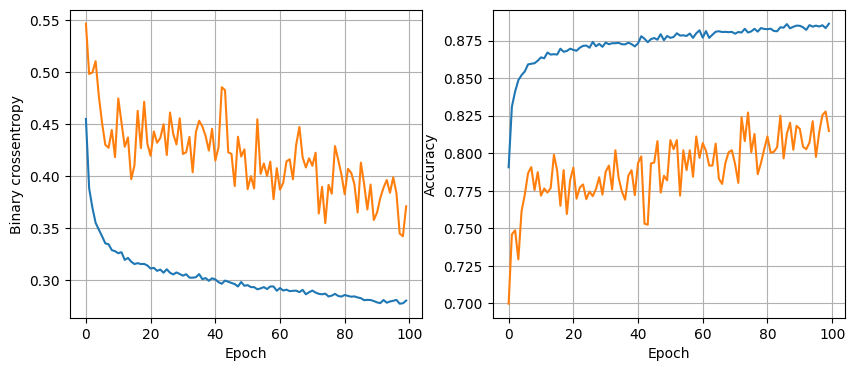

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8735 - loss: 0.2925  
64 nodes, dropout 0.2, lr 0.001, batch size 64


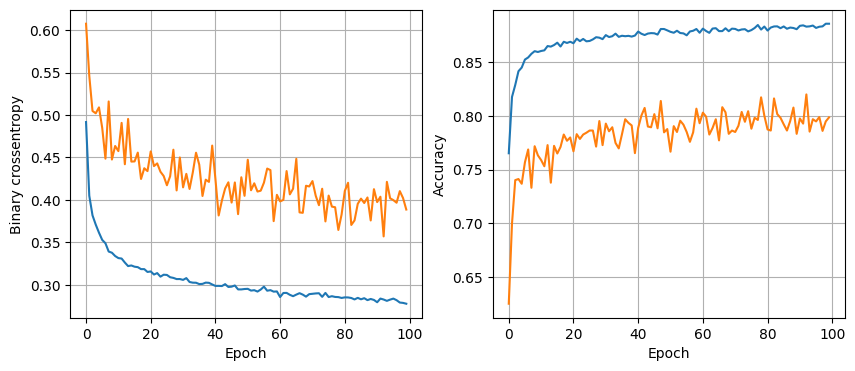

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8793 - loss: 0.2907
64 nodes, dropout 0.2, lr 0.001, batch size 128


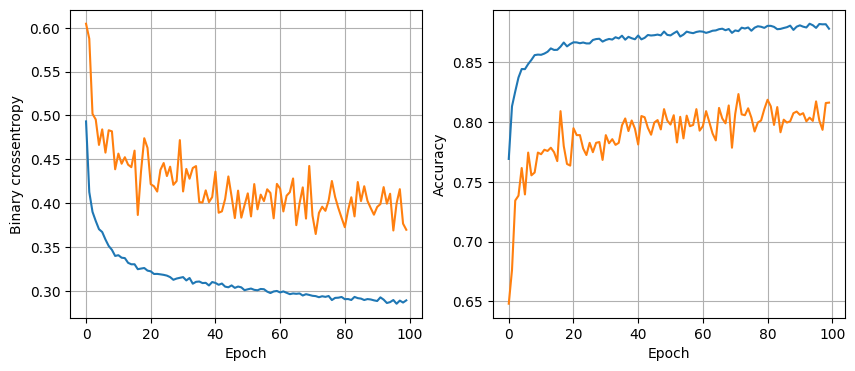

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8767 - loss: 0.2923


In [71]:
# COMPARING LEAST VALIDATION LOSS MODEL
least_val_loss = float('inf')
least_loss_model = None

# LOOPING, TO TRAIN MODELS WITH THOSE DIFFERENT PARAMETERS' VALUE
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        
        # Explanation
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        
        # Train model
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        
        # Plot diagram
        plot_history(history)
        
        # Validation loss 
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

Let's see the test and prediction target (in this case the visible is 6/6 which is pretty good)

In [72]:
y_pred = least_loss_model.predict(X_test)

# If y_pred greater than 0.5, set that to true or else false. Then cast the type into int, reshape it into one dimensional array 
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step


array([0, 1, 1, ..., 1, 1, 1])

In [73]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1289
           1       0.88      0.95      0.91      2515

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Slightly better than KVM, this might be the best classification model for this dataset